# Enron  Analysis: 2000 Partition

## Data Preprocessing

In [1]:
import pandas as pd

# Importing data
main = pd.read_csv('../../data/processed_emails.csv',index_col=False)
main.replace(to_replace='NaN', value=None, inplace=True)
main.drop(['message', 'file'], axis = 1, inplace=True)

# Turning date strings int datetime objects
main['date'] = pd.to_datetime(main['date'])

main.head()

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_90342/2735748863.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main['date'] = pd.to_datetime(main['date'])


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,Here is our forecast,phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-14 16:39:00-07:00
1,Traveling to have a business meeting takes the...,phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-04 13:51:00-07:00
2,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00


In [2]:
data_00 = main[(main['date'] < pd.to_datetime('2001-01-01 00:00:00-07:00')) & 
                (main['date'] >= pd.to_datetime('2000-01-01 00:00:00-07:00'))]
data_00.head()

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
2,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,NaN,NaN,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00
5,"Greg, How about either next Tuesday or Thursda...",phillip.allen@enron.com,greg.piper@enron.com,NaN,NaN,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 04:17:00-07:00
6,Please cc the following distribution list with...,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-22 07:44:00-07:00


In [3]:
#Grouping by quarter

q1_2000 = data_00[data_00['date'] <= pd.to_datetime('2001-03-31 23:59:59-07:00')]
q2_2000 = data_00[(data_00['date'] <= pd.to_datetime('2001-06-30 23:59:59-07:00')) & (data_00['date'] >= pd.to_datetime('2000-04-01 00:00:00-07:00'))]
q3_2000 = data_00[(data_00['date'] < pd.to_datetime('2001-09-30 23:59:59-07:00')) & (data_00['date'] >= pd.to_datetime('2000-07-01 00:00:00-07:00'))]
q4_2000 = data_00[(data_00['date'] <= pd.to_datetime('2001-12-31 23:59:59-07:00')) & (data_00['date'] >= pd.to_datetime('2000-10-01 00:00:00-07:00'))]

quarterly_data = [q1_2000, q2_2000, q3_2000, q4_2000]


# Network Analysis | 2000

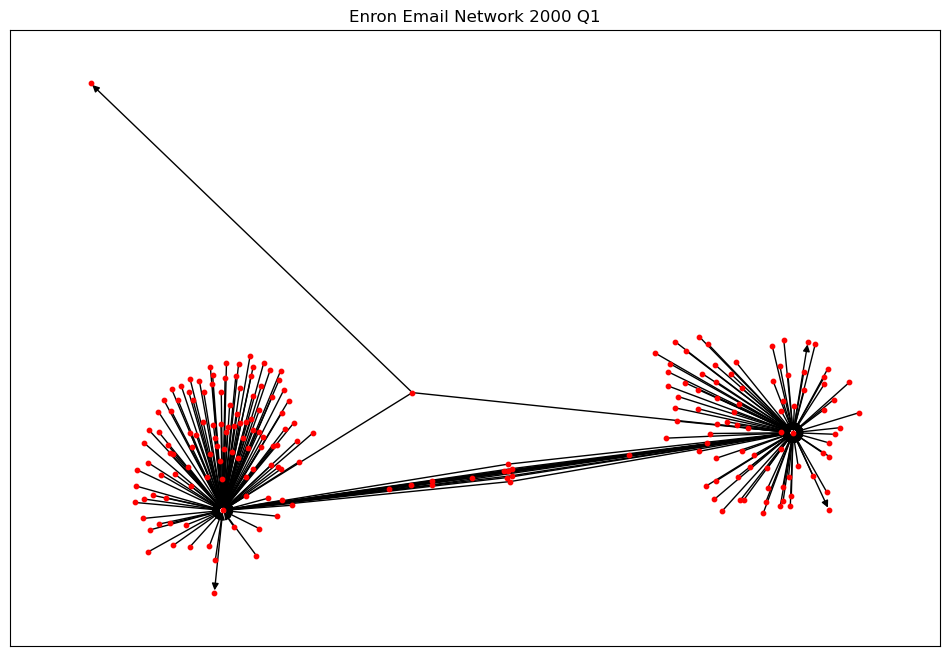

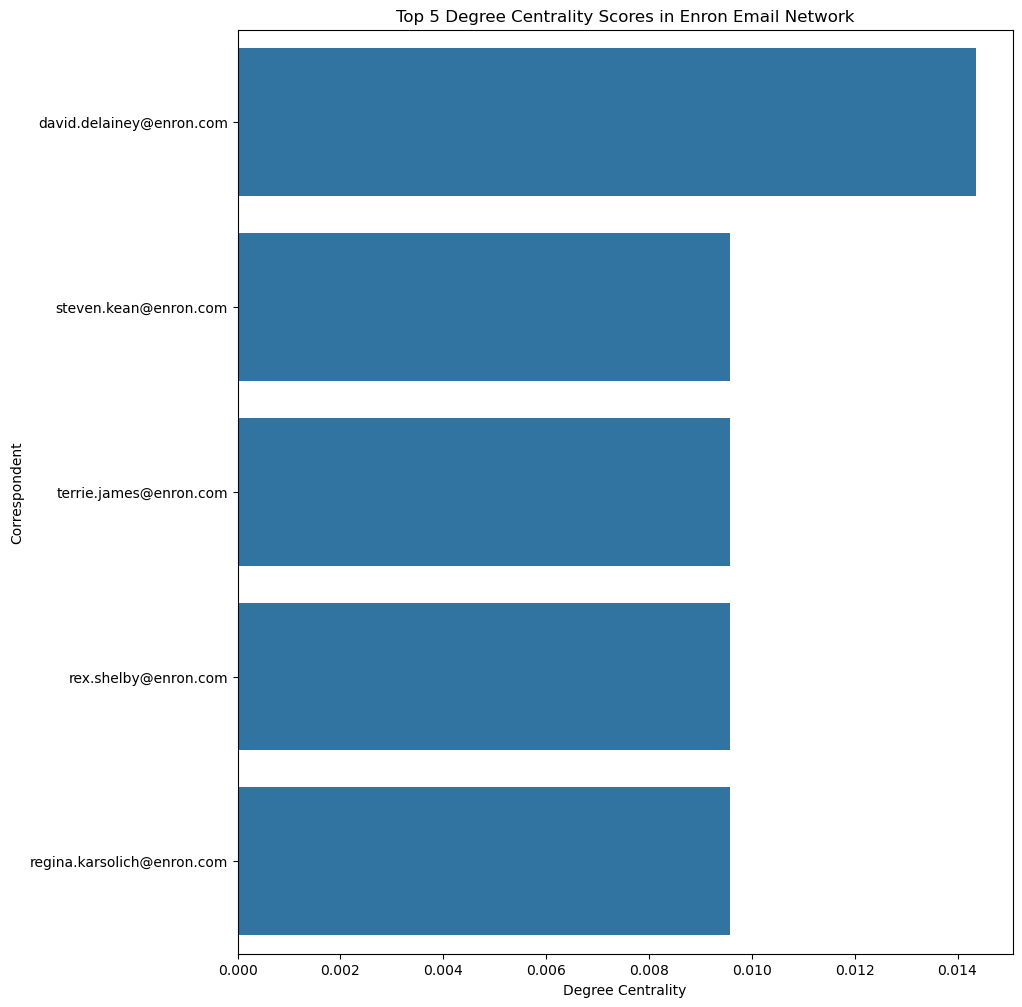



Executives: ['jeff.skilling@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'rebecca.mark@enron.com', 'arthur.andersen@enron.com', 'lou.pai@enron.com']

Top 5 Most-Involved in Emails: ['david.delainey@enron.com', 'steven.kean@enron.com', 'terrie.james@enron.com', 'rex.shelby@enron.com', 'regina.karsolich@enron.com']


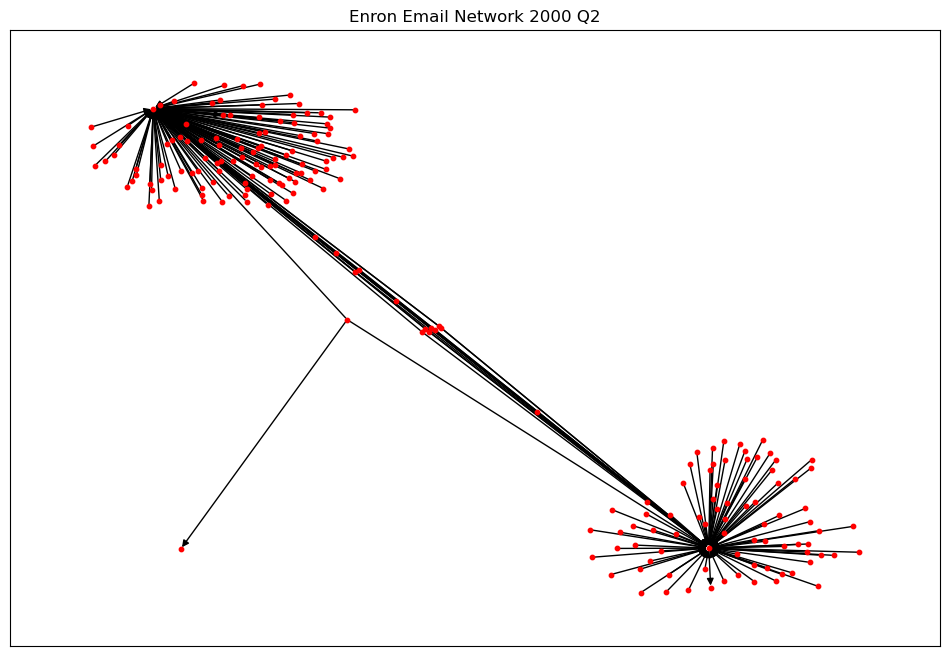

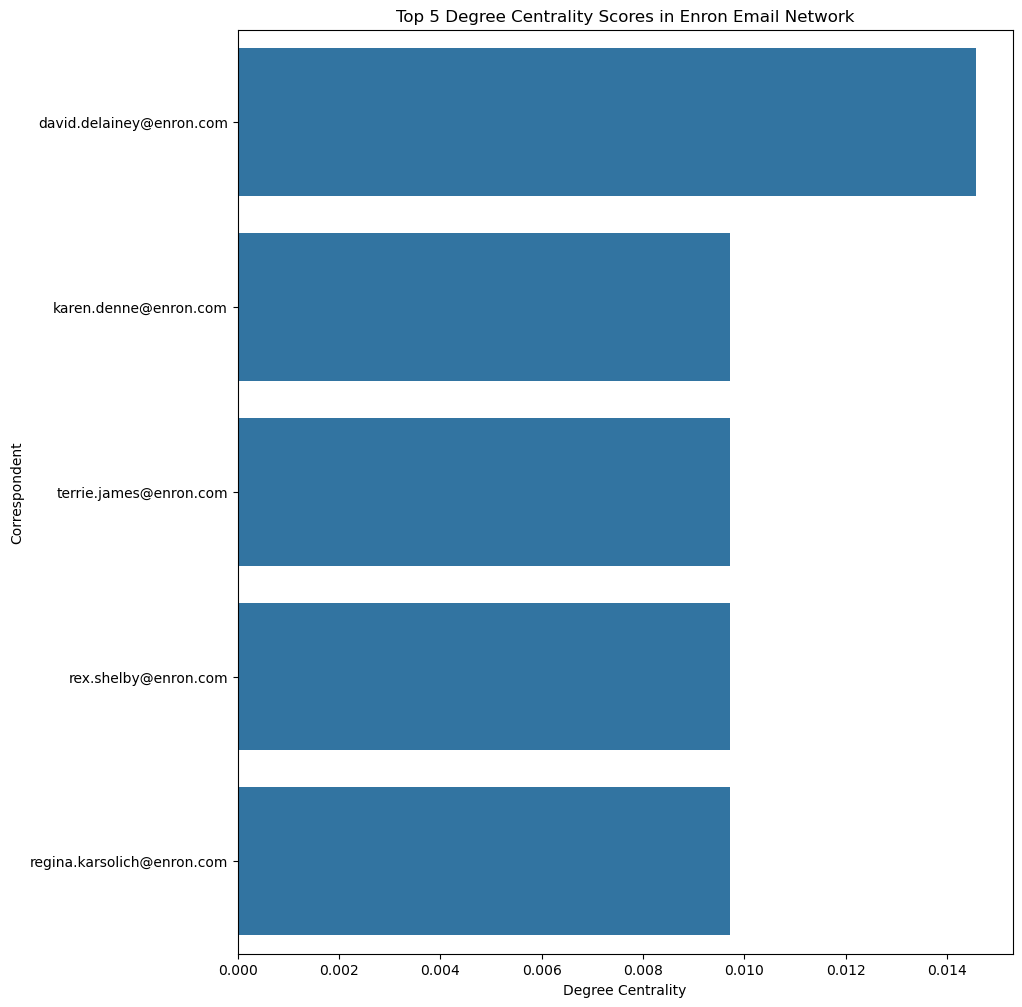



Executives: ['jeff.skilling@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'rebecca.mark@enron.com', 'arthur.andersen@enron.com', 'lou.pai@enron.com']

Top 5 Most-Involved in Emails: ['david.delainey@enron.com', 'karen.denne@enron.com', 'terrie.james@enron.com', 'rex.shelby@enron.com', 'regina.karsolich@enron.com']


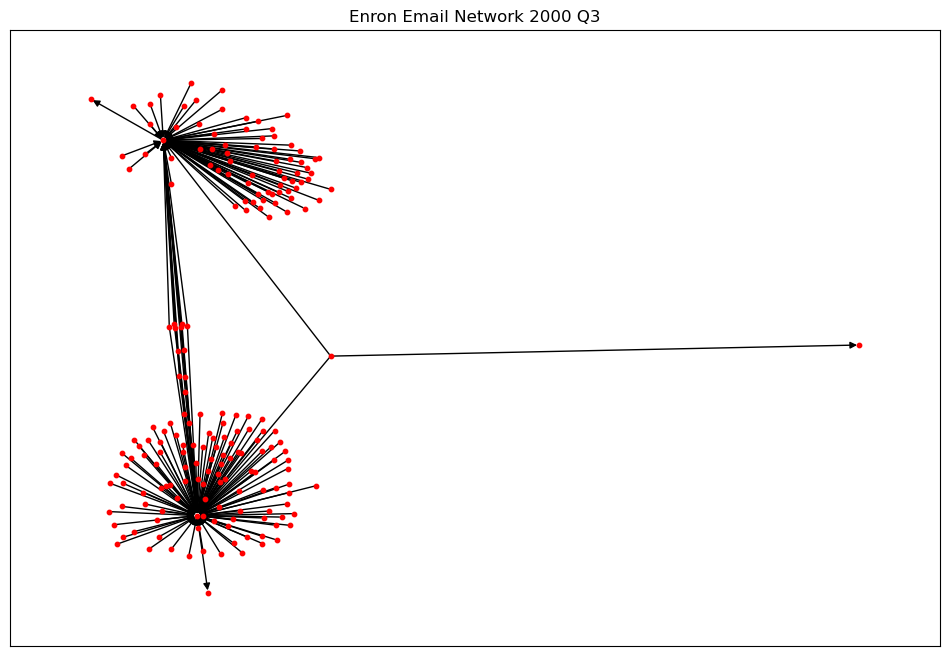

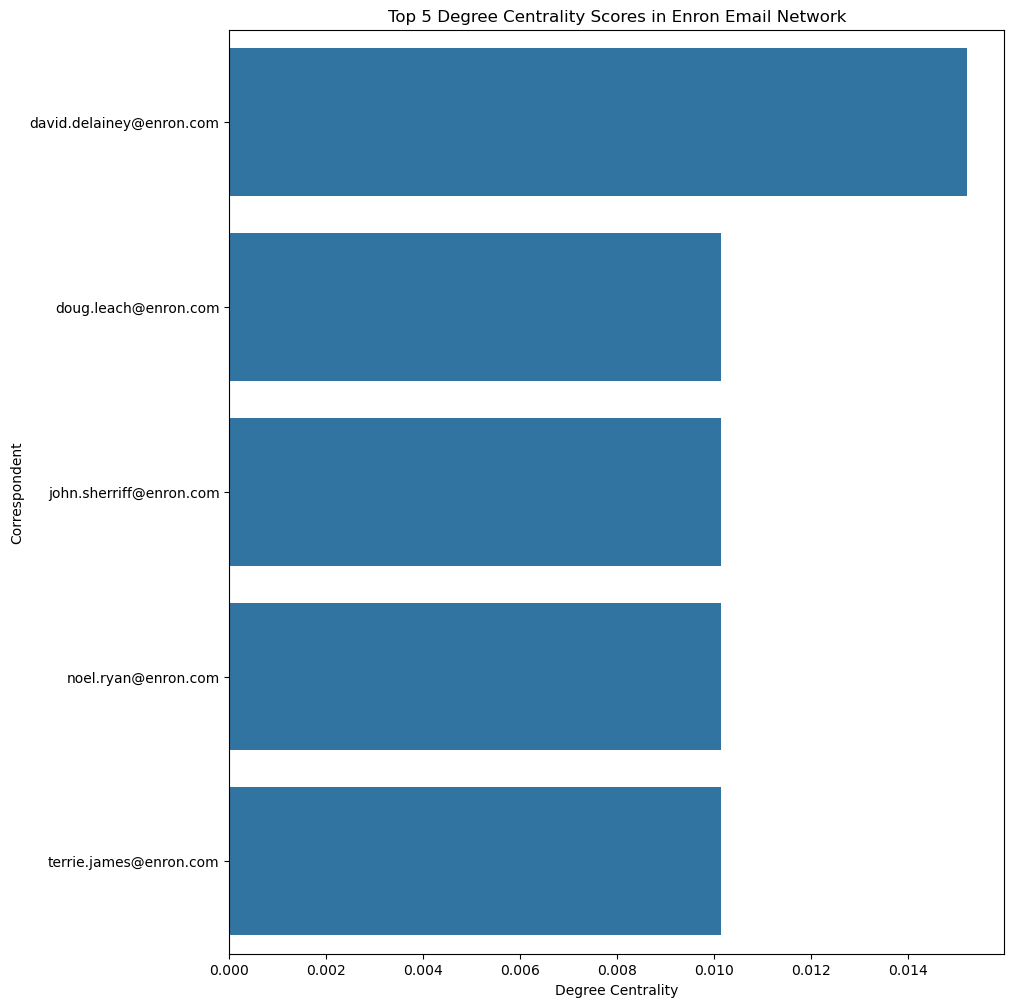



Executives: ['jeff.skilling@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'rebecca.mark@enron.com', 'arthur.andersen@enron.com', 'lou.pai@enron.com']

Top 5 Most-Involved in Emails: ['david.delainey@enron.com', 'doug.leach@enron.com', 'john.sherriff@enron.com', 'noel.ryan@enron.com', 'terrie.james@enron.com']


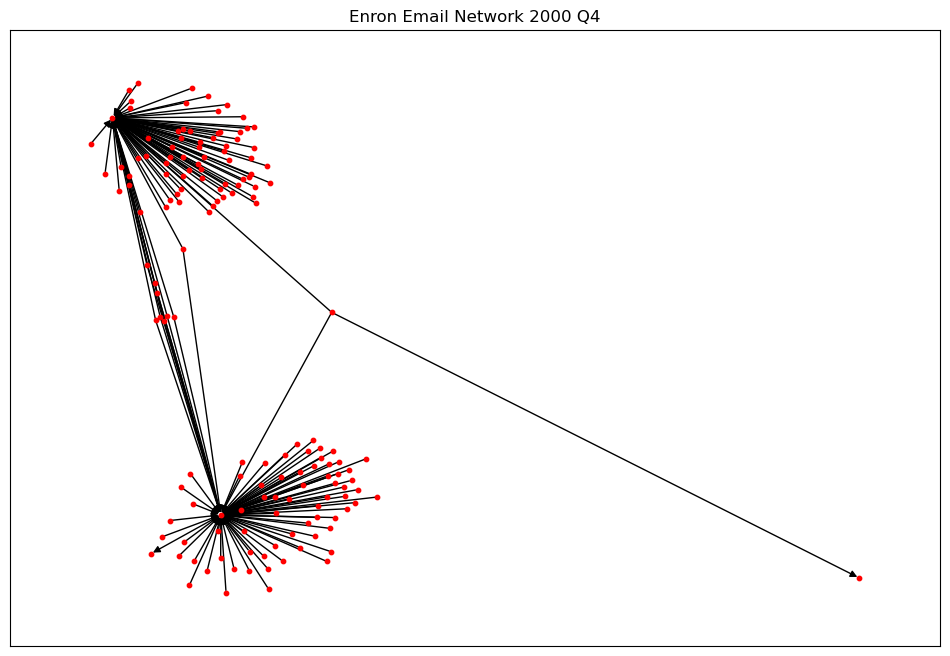

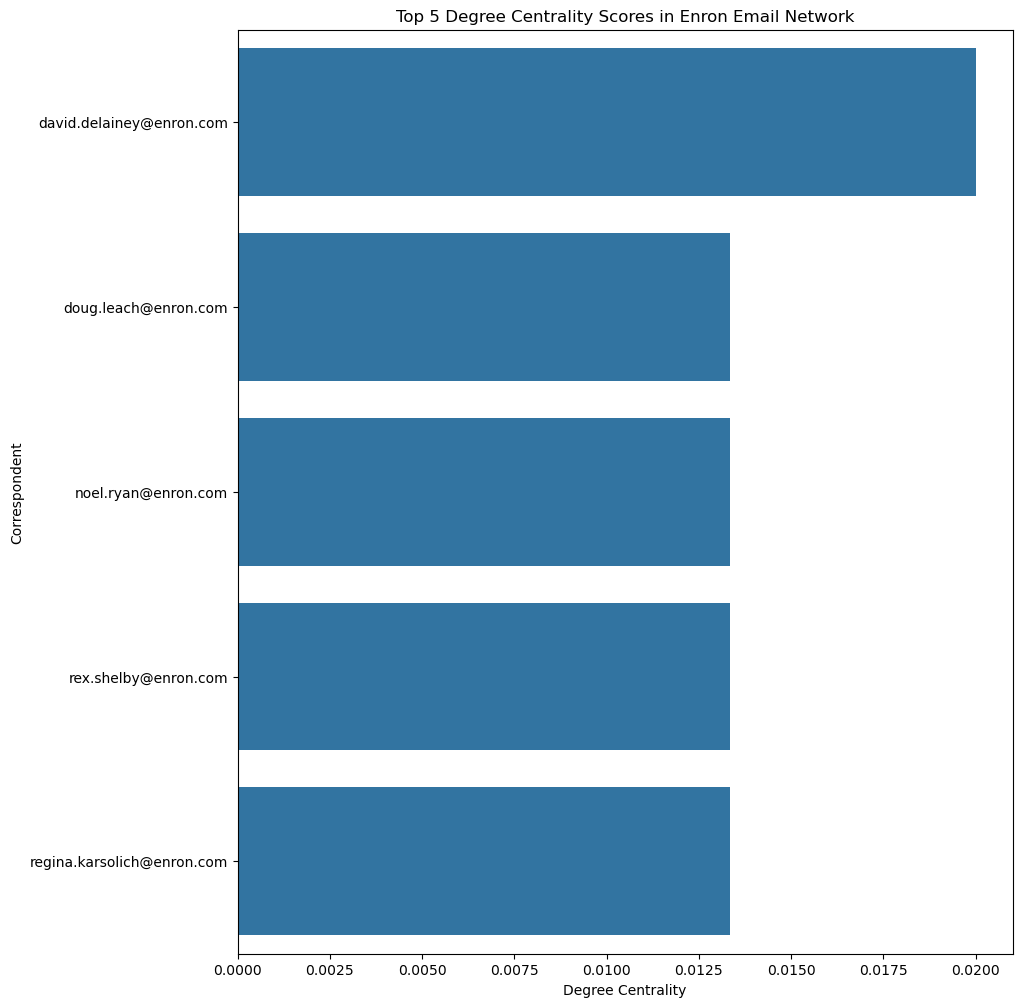



Executives: ['jeff.skilling@enron.com', 'kenneth.lay@enron.com', 'andrew.fastow@enron.com', 'rebecca.mark@enron.com', 'arthur.andersen@enron.com', 'lou.pai@enron.com']

Top 5 Most-Involved in Emails: ['david.delainey@enron.com', 'doug.leach@enron.com', 'noel.ryan@enron.com', 'rex.shelby@enron.com', 'regina.karsolich@enron.com']


In [4]:
import network_funcs as nf

executives = nf.get_executives()
suspicious_individuals = []
for _, i in enumerate(quarterly_data):
    G = nf.create_network(i, f"Enron Email Network 2000 Q{_+1}")
    cent_df = nf.degree_centrality(G)
    cent_list = cent_df['name'].to_list()
    sus_folks = executives + cent_list[:5]
    print(f"\n\nExecutives: {executives}\n\nTop 5 Most-Involved in Emails: {cent_list[:5]}")
    suspicious_individuals.append(sus_folks)



# 1. Assesing Quarter 1 of 2000

## Sentiment Analysis

In [5]:
#For 2000


#Grouping by quarter
q1_2000 = data_00[data_00['date'] <= pd.to_datetime('2001-03-31 23:59:59-07:00')]

q1_2000['time'] = pd.to_datetime(q1_2000['date'], utc=True).dt.time

# Finding emails after hours
q1_2000_ah = q1_2000[(q1_2000['time'] > pd.to_datetime('19:00:00-07:00').time()) | (q1_2000['time'] < pd.to_datetime('06:00:00-07:00').time())]
q1_2000_ah

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
104,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-10 15:02:00-07:00,22:02:00
545,X-FileName: pallen.nsfPLEASE APPROVE HIM FOR T...,ina.rangel@enron.com,arsystem@mailman.enron.com,X-To: ARSystem@mailman.enron.com @ ENRON,X-cc:,Re: Your Approval is Overdue: Access Request for,X-bcc:,2000-12-18 12:22:00-08:00,20:22:00
602,X-FileName: pallen.nsfIn today's Daily Update ...,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,X-To: <pallen@enron.com>,X-cc:,"December 14, 2000 - Bear Stearns' predictions ...",X-bcc:,2000-12-13 18:41:00-08:00,02:41:00
695,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-08-10 15:02:00-07:00,22:02:00
813,Hi AllWe are looking for a wheat farmer near A...,bobregon@bga.com,strawbale@crest.org,NaN,NaN,Central Texas Bale Resource,\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-03-14 17:07:00-08:00,01:07:00
...,...,...,...,...,...,...,...,...,...
516064,travis.mccullough@enron.comX-From: Travis McCu...,travis.mccullough@enron.com,eksasson@swidlaw.com,Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,Re: eSpeed/Enron Subscription Documents,"Bcc: afried@cantor.com, andy.zipper@enron.com,...",2000-11-29 14:04:00-08:00,22:04:00
516066,"Andy, do we have any intention of doing any in...",bob.hillier@enron.com,andy.zipper@enron.com,NaN,NaN,FW: Tradespark Requirements,\Andrew_Zipper_Nov2001\Notes Folders\Espeed,2000-12-07 14:55:00-08:00,22:55:00
516359,X-From: Raj Mahajan <raj.mahajan@kiodex.com>X-...,raj.mahajan@kiodex.com,"lydia.cannon@enron.com, jay.webb@enron.com, dr...",Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,"\traj.mahajan@kiodex.com, jay@enron.com","Bcc: andy.zipper@enron.com, mary.weatherstone@...",2000-12-13 18:01:00-08:00,02:01:00
516844,Content-Type: text/plain; charset=us-asciiCont...,davidpsmith@att.net,jamills@storm.ca,"\tjoanna.silver@redklay.com, syscokid@bellsout...","\tseansh@attachmate.com, darcy@dialin.net, dsh...",new email address,"\tjrosen@cadiesel.com, bmraynor@mq.psd.k12.ca....",2000-09-09 15:01:00-07:00,22:01:00


In [6]:
sus_df_q1 = q1_2000_ah[(q1_2000_ah['sender'].isin(suspicious_individuals[0])) | (q1_2000_ah['recipient1'].isin(suspicious_individuals[0]))]
sus_df_q1

,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
20638,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
20931,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\'sent mail,2000-06-30 12:59:00-07:00,19:59:00
21812,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
22571,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\All documents,2000-06-30 12:59:00-07:00,19:59:00
25855,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\Discussion t...,2000-06-30 12:59:00-07:00,19:59:00
...,...,...,...,...,...,...,...,...,...
461201,Congratulations Dave! You're the king!Fletch,fletcher.sturm@enron.com,david.delainey@enron.com,NaN,NaN,NaN,\Fletcher_Sturm_Dec2000\Notes Folders\Sent,2000-03-05 12:42:00-08:00,20:42:00
500355,X-Origin: Whalley-LX-FileName: gwhalley.nsfJef...,liz.taylor@enron.com,jeff.skilling@enron.com,X-From: Liz M Taylor,X-To: Jeff Skilling,Jeff Skilling does MS 150,X-cc: Sherri Sera,2000-04-03 13:06:00-07:00,20:06:00
501508,X-Origin: Whalley-LX-FileName: gwhalley.nsfJef...,liz.taylor@enron.com,jeff.skilling@enron.com,X-From: Liz M Taylor,X-To: Jeff Skilling,Jeff Skilling does MS 150,X-cc: Sherri Sera,2000-04-03 13:06:00-07:00,20:06:00
502419,X-Origin: Whalley-LX-FileName: gwhalley.nsfJef...,liz.taylor@enron.com,jeff.skilling@enron.com,X-From: Liz M Taylor,X-To: Jeff Skilling,Jeff Skilling does MS 150,X-cc: Sherri Sera,2000-04-03 13:06:00-07:00,20:06:00


In [7]:
sus_df_q1.drop_duplicates(inplace=True)
sus_df_q1

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_90342/2089915391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_df_q1.drop_duplicates(inplace=True)


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
20638,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
20931,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\'sent mail,2000-06-30 12:59:00-07:00,19:59:00
22571,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\All documents,2000-06-30 12:59:00-07:00,19:59:00
25855,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\Discussion t...,2000-06-30 12:59:00-07:00,19:59:00
31493,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\Sent,2000-06-30 12:59:00-07:00,19:59:00
...,...,...,...,...,...,...,...,...,...
460160,Congratulations Dave! You're the king!Fletch,fletcher.sturm@enron.com,david.delainey@enron.com,NaN,NaN,NaN,\Fletcher_Sturm_Dec2000\Notes Folders\'sent mail,2000-03-05 12:42:00-08:00,20:42:00
460371,Congratulations Dave! You're the king!Fletch,fletcher.sturm@enron.com,david.delainey@enron.com,NaN,NaN,NaN,\Fletcher_Sturm_Dec2000\Notes Folders\All docu...,2000-03-05 12:42:00-08:00,20:42:00
460600,Congratulations Dave! You're the king!Fletch,fletcher.sturm@enron.com,david.delainey@enron.com,NaN,NaN,NaN,\Fletcher_Sturm_Dec2000\Notes Folders\Discussi...,2000-03-05 12:42:00-08:00,20:42:00
461201,Congratulations Dave! You're the king!Fletch,fletcher.sturm@enron.com,david.delainey@enron.com,NaN,NaN,NaN,\Fletcher_Sturm_Dec2000\Notes Folders\Sent,2000-03-05 12:42:00-08:00,20:42:00


In [8]:
import sentiment_funcs as sf

# Parititioning data into groups of 1000
chunks_00s = sf.chunk_dataframe(sus_df_q1, chunk_size=100)

/opt/anaconda3/envs/enron/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
#Sentiment classification
data_q1 = sf.label_df(chunks_00s)
data_q1


Processing Chunk 1/8


Processing Chunk 2/8


Processing Chunk 3/8


Processing Chunk 4/8


Processing Chunk 5/8


Processing Chunk 6/8


Processing Chunk 7/8


Processing Chunk 8/8



,text,embeddings,label
0,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,"[-0.034200724214315414, -0.08523061126470566, ...",positive
1,Attached are my accomplishments for the first ...,"[-0.08623959869146347, 0.0255301371216774, 0.0...",positive
2,Attached are my accomplishments for the first ...,"[-0.08623959869146347, 0.0255301371216774, 0.0...",positive
3,Attached are my accomplishments for the first ...,"[-0.08623959869146347, 0.0255301371216774, 0.0...",positive
4,Attached are my accomplishments for the first ...,"[-0.08623959869146347, 0.0255301371216774, 0.0...",positive
...,...,...,...
703,Congratulations Dave! You're the king!Fletch,"[-0.03563590720295906, 0.05691307410597801, 0....",positive
704,Congratulations Dave! You're the king!Fletch,"[-0.03563590720295906, 0.05691307410597801, 0....",positive
705,Congratulations Dave! You're the king!Fletch,"[-0.03563590720295906, 0.05691307410597801, 0....",positive
706,Congratulations Dave! You're the king!Fletch,"[-0.03563590720295906, 0.05691307410597801, 0....",positive


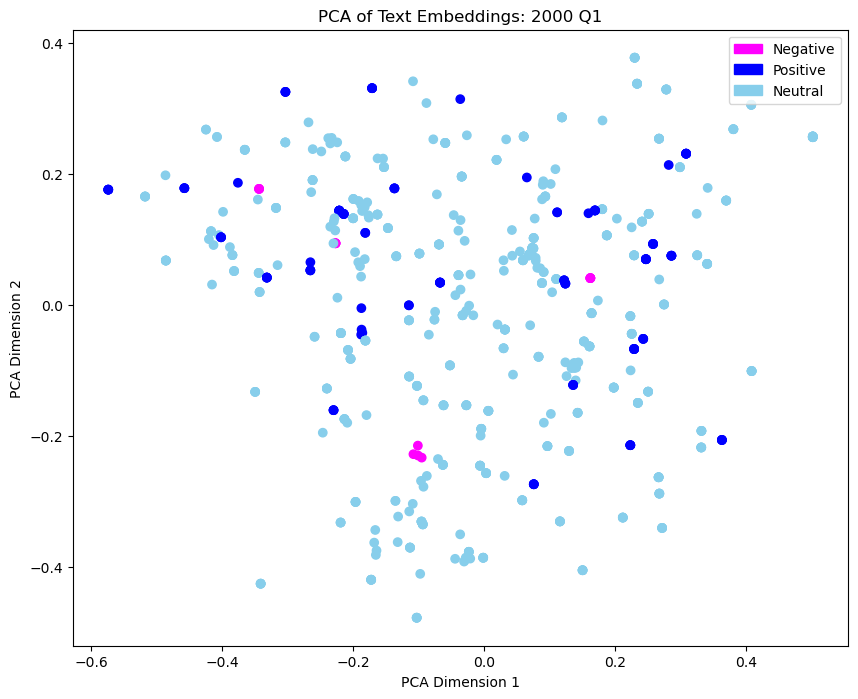

In [10]:

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



def PCA_plot(data: pd.DataFrame, title: str):
    # Reduce dimensionality using PCA
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(data['embeddings'].tolist())


    labels = data['label'].tolist()
    colors = ['magenta' if label == 'negative' else 'blue' if label == 'positive' else '#87CEEB' for label in labels]

    #Create Scatter Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)


    negative_patch = mpatches.Patch(color='magenta', label='Negative')
    positive_patch = mpatches.Patch(color='blue', label='Positive')
    neutral_patch = mpatches.Patch(color='#87CEEB', label='Neutral')

    plt.legend(handles=[negative_patch, positive_patch, neutral_patch])
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.title(f'PCA of Text Embeddings: {title}')
    plt.show()


PCA_plot(data_q1, '2000 Q1')

In [11]:
plt.savefig('../../figures/sentiment_p2_q1.png')

<Figure size 640x480 with 0 Axes>

## Printing  Messages

In [12]:
negative_msgs = data_q1[data_q1['label'] == 'negative']
neutral_msgs = data_q1[data_q1['label'] == 'neutral']
positive_msgs = data_q1[data_q1['label'] == 'positive']

def print_emails (df):
    for _, row in df.iterrows():
        print(f"\n{_}: {row['text']}\n")

In [13]:
# Negative Emails
print_emails(negative_msgs)

# Suspicious Emails: 327 (Look into Benjamin Thomason), 298 (Who is Griffin?)



24: X-bcc: X-Folder: \David_Delainey_Dec2000\Notes Folders\'sent mailX-Origin: Delainey-DX-FileName: ddelain.nsfDavid, I have a problem with the RAC comments made on page #2 of the DASH.  Specifically, the two paragraphs basically add no value and just confuse the reader (ie) what is your opinion?  Is this a good sale or can significant recovery (on a risk adjusted basis) occur if we convert the sub debt and infuse more equity?  Are we not receiving enough value from the CFPC given the possible recovery of this sector?  The DASH is deficient in its view of Basic's prospects given current energy prices.Jeff/Dick/Ray, what are your opinions?Independent of the desire to move on - what is the right call - I do not want to give value away in any divestiture or restructuring. RegardsDelainey


61: Richard, I think I am starting to obsess and I really don't want you guys working on this; however, it think that it is very odd that this Griffin guy over an eight week process, two registered le

In [14]:
#Neutral Emails
print_emails(neutral_msgs)


5: Agreed.  I'll handle it.Best,Jeff	Steven J Kean	10/08/2000 05:54 PM				 To: Jeff Dasovich/NA/Enron@Enron		 cc: 		 Subject: Re: Nov. 13 UC summit conference on electricityI've got a few too many speeches coming up.  You are probably in the best position to address this crowd (time for the student to teach the teacher), but I'd understand if you think it would be awkward (the we should just decline).	Jeff Dasovich	10/05/2000 01:23 PM				 To: Tim Belden/HOU/ECT@ECT, skean@enron.com		 cc: 		 Subject: Re: Nov. 13 UC summit conference on electricitySteve:  Let me know if you'd like to discuss.  I like Tim's idea re: maybe you should take the slot.   But in my view definitely not Skilling.  I think you saw my thoughts about this conference in a previous email exchange with Schroeder re: Littlechild.  Also, they're breaking my arms and legs about sponsoring ($3-5K range).  I had a thought that maybe EBS could stream the conference as an in-kind contribution---the PR that EBS gets out of st

In [15]:
print_emails(positive_msgs)

#Sus: 8216


0: X-Origin: Beck-SX-FileName: sbeck.nsfThanks in advance for agreeing to speak at the Global Operations Controller Forum that I am hosting next week.  There will be approximately 30 Enron business controllers present at the meeting.  All have responsibility for mid and back office operations for the following Enron entities:  Enron North America, Enron Europe, Enron South America, Enron Global Markets, Enron Industrial Markets, Enron Broadband Services and Enron Energy Services.  Attendees will be here from Houston, Calgary, Tokyo, Sydney, London and New York (metals business).   Attached for your reference is the agenda. There may be some slight changes before the forum begins, but this will give you a good idea of the topics to be covered and the other speakers who will address the group.  You are scheduled to address the group as follows:Date:  Tuesday, October 24, 2000Time:  8:30 am  (breakfast will be served at 8:00 and you are invited to join us)Place:  The Warwick Hotel  The V

# 2. Assesing Quarter 2 of 2000

In [16]:
q2_2000['time'] = pd.to_datetime(q2_2000['date'], utc=True).dt.time
q2_2000_ah = q2_2000[(q2_2000['time'] > pd.to_datetime('19:00:00-07:00').time()) | (q2_2000['time'] < pd.to_datetime('06:00:00-07:00').time())]
q2_2000_ah

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_90342/2426238261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_2000['time'] = pd.to_datetime(q2_2000['date'], utc=True).dt.time


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
104,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-10 15:02:00-07:00,22:02:00
545,X-FileName: pallen.nsfPLEASE APPROVE HIM FOR T...,ina.rangel@enron.com,arsystem@mailman.enron.com,X-To: ARSystem@mailman.enron.com @ ENRON,X-cc:,Re: Your Approval is Overdue: Access Request for,X-bcc:,2000-12-18 12:22:00-08:00,20:22:00
602,X-FileName: pallen.nsfIn today's Daily Update ...,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,X-To: <pallen@enron.com>,X-cc:,"December 14, 2000 - Bear Stearns' predictions ...",X-bcc:,2000-12-13 18:41:00-08:00,02:41:00
695,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-08-10 15:02:00-07:00,22:02:00
820,"Dear phillip,This e-mail is automated notifica...",subscriptions@intelligencepress.com,pallen@enron.com,NaN,NaN,"NGI Publications - Thursday, 14 December 2000",\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-12-13 13:28:00-08:00,21:28:00
...,...,...,...,...,...,...,...,...,...
516064,travis.mccullough@enron.comX-From: Travis McCu...,travis.mccullough@enron.com,eksasson@swidlaw.com,Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,Re: eSpeed/Enron Subscription Documents,"Bcc: afried@cantor.com, andy.zipper@enron.com,...",2000-11-29 14:04:00-08:00,22:04:00
516066,"Andy, do we have any intention of doing any in...",bob.hillier@enron.com,andy.zipper@enron.com,NaN,NaN,FW: Tradespark Requirements,\Andrew_Zipper_Nov2001\Notes Folders\Espeed,2000-12-07 14:55:00-08:00,22:55:00
516359,X-From: Raj Mahajan <raj.mahajan@kiodex.com>X-...,raj.mahajan@kiodex.com,"lydia.cannon@enron.com, jay.webb@enron.com, dr...",Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,"\traj.mahajan@kiodex.com, jay@enron.com","Bcc: andy.zipper@enron.com, mary.weatherstone@...",2000-12-13 18:01:00-08:00,02:01:00
516844,Content-Type: text/plain; charset=us-asciiCont...,davidpsmith@att.net,jamills@storm.ca,"\tjoanna.silver@redklay.com, syscokid@bellsout...","\tseansh@attachmate.com, darcy@dialin.net, dsh...",new email address,"\tjrosen@cadiesel.com, bmraynor@mq.psd.k12.ca....",2000-09-09 15:01:00-07:00,22:01:00


In [17]:
sus_df_q2 = q2_2000_ah[(q2_2000_ah['sender'].isin(suspicious_individuals[1])) | (q2_2000_ah['recipient1'].isin(suspicious_individuals[1]))]
sus_df_q2.drop_duplicates(inplace=True)
sus_df_q2

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_90342/3567306008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_df_q2.drop_duplicates(inplace=True)


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
20638,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
20931,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\'sent mail,2000-06-30 12:59:00-07:00,19:59:00
22571,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\All documents,2000-06-30 12:59:00-07:00,19:59:00
25855,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\Discussion t...,2000-06-30 12:59:00-07:00,19:59:00
31493,Attached are my accomplishments for the first ...,sally.beck@enron.com,david.delainey@enron.com,NaN,NaN,Accomplishments - First Half of 2000,\Sally_Beck_Dec2000\Notes Folders\Sent,2000-06-30 12:59:00-07:00,19:59:00
...,...,...,...,...,...,...,...,...,...
445897,Jeff - Congratulations!Will you be attending B...,alanmit@microsoft.com,jeff.skilling@enron.com,NaN,NaN,FW: Jeff Skilling is now CEO of Enron..,\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-12-13 12:29:00-08:00,20:29:00
445899,"> Dear Jeff,>> Although I don't think we've me...",lrivera@endesa.es,jeff.skilling@enron.com,NaN,NaN,contact,\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-12-03 12:58:00-08:00,20:58:00
445912,It's my pleasure to attend -- I am looking for...,daronoff@greylock.com,jeff.skilling@enron.com,NaN,NaN,"RE: YPO Panel, April 24, 2001",\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-11-28 11:47:00-08:00,19:47:00
446101,Thanks for your support in the board meeting t...,richard.lammers@enron.com,jeff.skilling@enron.com,NaN,NaN,Re: Background info on Cuiaba board pitch today,\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-12-11 13:06:00-08:00,21:06:00


### Sentiment Analysis

In [18]:
#Sentiment classification


chunks_q2 = sf.chunk_dataframe(sus_df_q2, chunk_size=100)
data_q2 = sf.label_df(chunks_q2)
data_q2


Processing Chunk 1/5


Processing Chunk 2/5


Processing Chunk 3/5


Processing Chunk 4/5


Processing Chunk 5/5



,text,embeddings,label
0,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,"[-0.034200724214315414, -0.08523061126470566, ...",positive
1,Attached are my accomplishments for the first ...,"[-0.08623959869146347, 0.0255301371216774, 0.0...",positive
2,Attached are my accomplishments for the first ...,"[-0.08623959869146347, 0.0255301371216774, 0.0...",positive
3,Attached are my accomplishments for the first ...,"[-0.08623959869146347, 0.0255301371216774, 0.0...",positive
4,Attached are my accomplishments for the first ...,"[-0.08623959869146347, 0.0255301371216774, 0.0...",positive
...,...,...,...
447,Jeff - Congratulations!Will you be attending B...,"[-0.13397207856178284, -0.016387466341257095, ...",positive
448,"> Dear Jeff,>> Although I don't think we've me...","[-0.06200852617621422, -0.031187551096081734, ...",neutral
449,It's my pleasure to attend -- I am looking for...,"[-0.07384911924600601, -0.021096443757414818, ...",positive
450,Thanks for your support in the board meeting t...,"[-0.06299137324094772, -0.009978244081139565, ...",positive


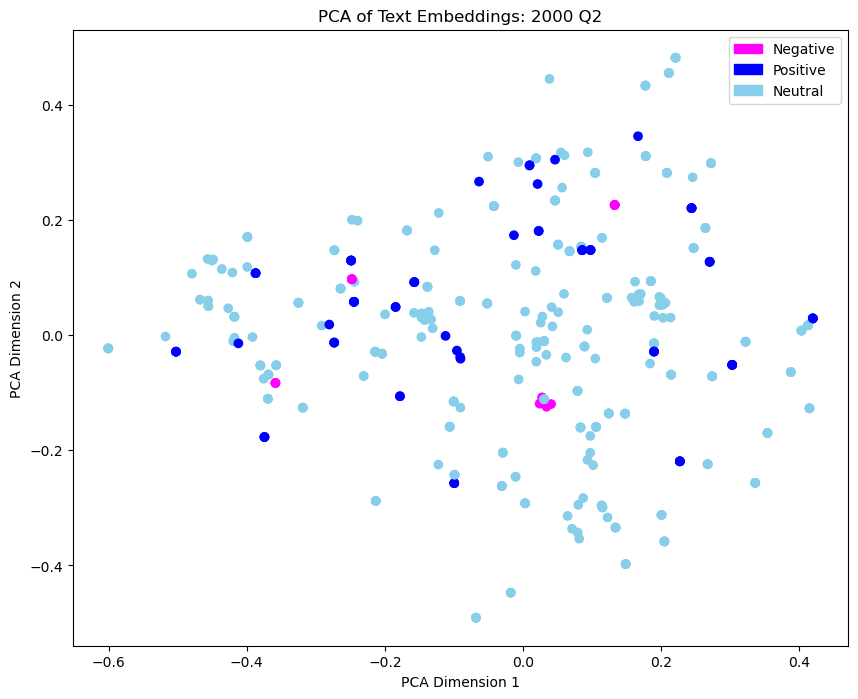

In [36]:

PCA_plot(data_q2, '2000 Q2')

### Printing Messages

In [20]:
negative_msgs_q2 = data_q2[data_q2['label'] == 'negative']
neutral_msgs_q2 = data_q2[data_q2['label'] == 'neutral']
positive_msgs_q2 = data_q2[data_q2['label'] == 'positive']

In [21]:
print_emails(negative_msgs_q2)


24: X-bcc: X-Folder: \David_Delainey_Dec2000\Notes Folders\'sent mailX-Origin: Delainey-DX-FileName: ddelain.nsfDavid, I have a problem with the RAC comments made on page #2 of the DASH.  Specifically, the two paragraphs basically add no value and just confuse the reader (ie) what is your opinion?  Is this a good sale or can significant recovery (on a risk adjusted basis) occur if we convert the sub debt and infuse more equity?  Are we not receiving enough value from the CFPC given the possible recovery of this sector?  The DASH is deficient in its view of Basic's prospects given current energy prices.Jeff/Dick/Ray, what are your opinions?Independent of the desire to move on - what is the right call - I do not want to give value away in any divestiture or restructuring. RegardsDelainey


61: Richard, I think I am starting to obsess and I really don't want you guys working on this; however, it think that it is very odd that this Griffin guy over an eight week process, two registered le

# 3. Assesing Quarter 3 of 2000

In [22]:
q3_2000['time'] = pd.to_datetime(q3_2000['date'], utc=True).dt.time

# Finding emails after hours
q3_2000_ah = q3_2000[(q3_2000['time'] > pd.to_datetime('19:00:00-07:00').time()) | (q3_2000['time'] < pd.to_datetime('06:00:00-07:00').time())]
q3_2000_ah

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_90342/3612724306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2000['time'] = pd.to_datetime(q3_2000['date'], utc=True).dt.time


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
104,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-10 15:02:00-07:00,22:02:00
545,X-FileName: pallen.nsfPLEASE APPROVE HIM FOR T...,ina.rangel@enron.com,arsystem@mailman.enron.com,X-To: ARSystem@mailman.enron.com @ ENRON,X-cc:,Re: Your Approval is Overdue: Access Request for,X-bcc:,2000-12-18 12:22:00-08:00,20:22:00
602,X-FileName: pallen.nsfIn today's Daily Update ...,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,X-To: <pallen@enron.com>,X-cc:,"December 14, 2000 - Bear Stearns' predictions ...",X-bcc:,2000-12-13 18:41:00-08:00,02:41:00
695,StephaniePlease grant Paul the requested eol r...,phillip.allen@enron.com,stephanie.sever@enron.com,NaN,NaN,Re: Your approval is requested,\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-08-10 15:02:00-07:00,22:02:00
820,"Dear phillip,This e-mail is automated notifica...",subscriptions@intelligencepress.com,pallen@enron.com,NaN,NaN,"NGI Publications - Thursday, 14 December 2000",\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-12-13 13:28:00-08:00,21:28:00
...,...,...,...,...,...,...,...,...,...
516064,travis.mccullough@enron.comX-From: Travis McCu...,travis.mccullough@enron.com,eksasson@swidlaw.com,Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,Re: eSpeed/Enron Subscription Documents,"Bcc: afried@cantor.com, andy.zipper@enron.com,...",2000-11-29 14:04:00-08:00,22:04:00
516066,"Andy, do we have any intention of doing any in...",bob.hillier@enron.com,andy.zipper@enron.com,NaN,NaN,FW: Tradespark Requirements,\Andrew_Zipper_Nov2001\Notes Folders\Espeed,2000-12-07 14:55:00-08:00,22:55:00
516359,X-From: Raj Mahajan <raj.mahajan@kiodex.com>X-...,raj.mahajan@kiodex.com,"lydia.cannon@enron.com, jay.webb@enron.com, dr...",Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,"\traj.mahajan@kiodex.com, jay@enron.com","Bcc: andy.zipper@enron.com, mary.weatherstone@...",2000-12-13 18:01:00-08:00,02:01:00
516844,Content-Type: text/plain; charset=us-asciiCont...,davidpsmith@att.net,jamills@storm.ca,"\tjoanna.silver@redklay.com, syscokid@bellsout...","\tseansh@attachmate.com, darcy@dialin.net, dsh...",new email address,"\tjrosen@cadiesel.com, bmraynor@mq.psd.k12.ca....",2000-09-09 15:01:00-07:00,22:01:00


In [23]:
sus_df_q3 = q3_2000_ah[(q3_2000_ah['sender'].isin(suspicious_individuals[2])) | (q3_2000_ah['recipient1'].isin(suspicious_individuals[2]))]
sus_df_q3.drop_duplicates(inplace=True)
sus_df_q3

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_90342/1097666962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_df_q3.drop_duplicates(inplace=True)


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
20638,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
22497,X-Origin: Beck-SX-FileName: sbeck.nsfJohnI hav...,mike.jordan@enron.com,john.sherriff@enron.com,X-From: Mike Jordan,X-To: John Sherriff,Revised draft of the Risk Management Fundament...,"X-cc: Sally Beck, Brent A Price, Fernley Dyson",2000-07-17 12:54:00-07:00,19:54:00
37646,X-bcc: X-Folder: \Richard_Buy_Dec2000\Notes Fo...,rick.buy@enron.com,john.sherriff@enron.com,"Bcc: steve.young@enron.com, ted.murphy@enron.c...",\tmichael.kopper@enron.com,TXU Credit Exposure,X-From: Rick Buy,2000-11-27 13:31:00-08:00,21:31:00
37936,X-bcc: X-Folder: \Richard_Buy_Dec2000\Notes Fo...,rick.buy@enron.com,john.sherriff@enron.com,"Bcc: steve.young@enron.com, ted.murphy@enron.c...",\tmichael.kopper@enron.com,TXU Credit Exposure,X-From: Rick Buy,2000-11-27 13:31:00-08:00,21:31:00
38197,X-bcc: X-Folder: \Richard_Buy_Dec2000\Notes Fo...,rick.buy@enron.com,john.sherriff@enron.com,"Bcc: steve.young@enron.com, ted.murphy@enron.c...",\tmichael.kopper@enron.com,TXU Credit Exposure,X-From: Rick Buy,2000-11-27 13:31:00-08:00,21:31:00
...,...,...,...,...,...,...,...,...,...
444518,Jeff - Congratulations!Will you be attending B...,alanmit@microsoft.com,jeff.skilling@enron.com,NaN,NaN,FW: Jeff Skilling is now CEO of Enron..,\Jeffrey_Skilling_Dec2000\Notes Folders\Discus...,2000-12-13 12:29:00-08:00,20:29:00
445897,Jeff - Congratulations!Will you be attending B...,alanmit@microsoft.com,jeff.skilling@enron.com,NaN,NaN,FW: Jeff Skilling is now CEO of Enron..,\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-12-13 12:29:00-08:00,20:29:00
445899,"> Dear Jeff,>> Although I don't think we've me...",lrivera@endesa.es,jeff.skilling@enron.com,NaN,NaN,contact,\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-12-03 12:58:00-08:00,20:58:00
445912,It's my pleasure to attend -- I am looking for...,daronoff@greylock.com,jeff.skilling@enron.com,NaN,NaN,"RE: YPO Panel, April 24, 2001",\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-11-28 11:47:00-08:00,19:47:00


### Sentiment Analysis

In [24]:

chunks_q3 = sf.chunk_dataframe(sus_df_q3, chunk_size=100)
data_q3 = sf.label_df(chunks_q3)
data_q3


Processing Chunk 1/4


Processing Chunk 2/4


Processing Chunk 3/4


Processing Chunk 4/4



,text,embeddings,label
0,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,"[-0.034200724214315414, -0.08523061126470566, ...",positive
1,X-Origin: Beck-SX-FileName: sbeck.nsfJohnI hav...,"[-0.06110697612166405, -0.02187463827431202, -...",neutral
2,X-bcc: X-Folder: \Richard_Buy_Dec2000\Notes Fo...,"[-0.09213918447494507, -0.018040793016552925, ...",neutral
3,X-bcc: X-Folder: \Richard_Buy_Dec2000\Notes Fo...,"[-0.08564002811908722, -0.010709602385759354, ...",neutral
4,X-bcc: X-Folder: \Richard_Buy_Dec2000\Notes Fo...,"[-0.08398748189210892, -0.021119499579072, -0....",neutral
...,...,...,...
344,Jeff - Congratulations!Will you be attending B...,"[-0.13397207856178284, -0.016387466341257095, ...",positive
345,Jeff - Congratulations!Will you be attending B...,"[-0.13397207856178284, -0.016387466341257095, ...",positive
346,"> Dear Jeff,>> Although I don't think we've me...","[-0.06200852617621422, -0.031187551096081734, ...",neutral
347,It's my pleasure to attend -- I am looking for...,"[-0.07384911924600601, -0.021096443757414818, ...",positive


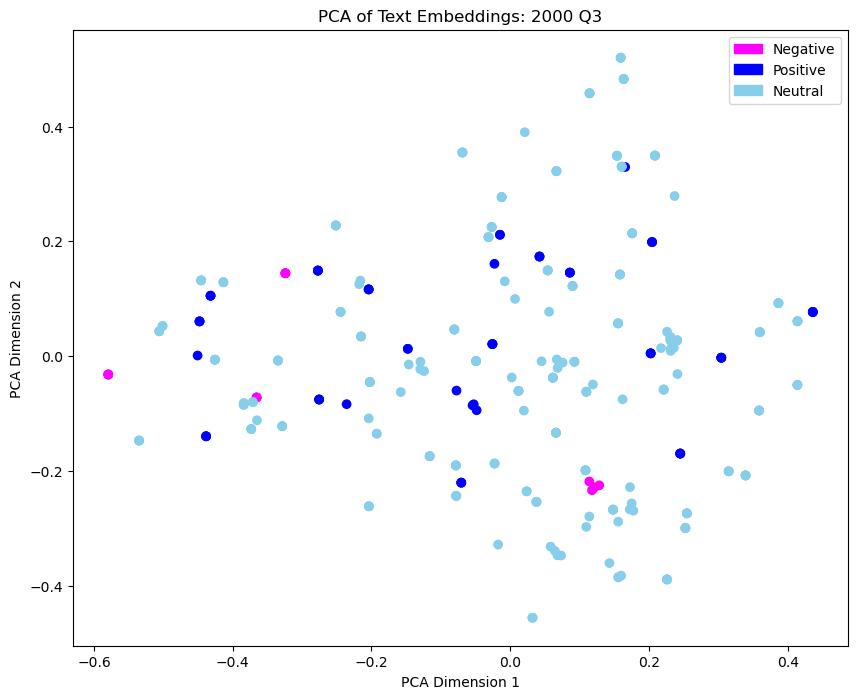

In [37]:
PCA_plot(data_q3, '2000 Q3')

### Printing Messages

In [25]:
negative_msgs_q3 = data_q3[data_q3['label'] == 'negative']
neutral_msgs_q3 = data_q3[data_q3['label'] == 'neutral']
positive_msgs_q3 = data_q3[data_q3['label'] == 'positive']

In [26]:
print_emails(negative_msgs_q3)


15: X-bcc: X-Folder: \David_Delainey_Dec2000\Notes Folders\'sent mailX-Origin: Delainey-DX-FileName: ddelain.nsfDavid, I have a problem with the RAC comments made on page #2 of the DASH.  Specifically, the two paragraphs basically add no value and just confuse the reader (ie) what is your opinion?  Is this a good sale or can significant recovery (on a risk adjusted basis) occur if we convert the sub debt and infuse more equity?  Are we not receiving enough value from the CFPC given the possible recovery of this sector?  The DASH is deficient in its view of Basic's prospects given current energy prices.Jeff/Dick/Ray, what are your opinions?Independent of the desire to move on - what is the right call - I do not want to give value away in any divestiture or restructuring. RegardsDelainey


52: Richard, I think I am starting to obsess and I really don't want you guys working on this; however, it think that it is very odd that this Griffin guy over an eight week process, two registered le

# 4. Assesing Quarter 4 of 2000

In [27]:
q4_2000['time'] = pd.to_datetime(q4_2000['date'], utc=True).dt.time

# Finding emails after hours
q4_2000_ah = q4_2000[(q4_2000['time'] > pd.to_datetime('19:00:00-07:00').time()) | (q4_2000['time'] < pd.to_datetime('06:00:00-07:00').time())]
q4_2000_ah

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_90342/2157245306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_2000['time'] = pd.to_datetime(q4_2000['date'], utc=True).dt.time


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
545,X-FileName: pallen.nsfPLEASE APPROVE HIM FOR T...,ina.rangel@enron.com,arsystem@mailman.enron.com,X-To: ARSystem@mailman.enron.com @ ENRON,X-cc:,Re: Your Approval is Overdue: Access Request for,X-bcc:,2000-12-18 12:22:00-08:00,20:22:00
602,X-FileName: pallen.nsfIn today's Daily Update ...,1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,X-To: <pallen@enron.com>,X-cc:,"December 14, 2000 - Bear Stearns' predictions ...",X-bcc:,2000-12-13 18:41:00-08:00,02:41:00
820,"Dear phillip,This e-mail is automated notifica...",subscriptions@intelligencepress.com,pallen@enron.com,NaN,NaN,"NGI Publications - Thursday, 14 December 2000",\Phillip_Allen_Dec2000\Notes Folders\All docum...,2000-12-13 13:28:00-08:00,21:28:00
1041,X-FileName: pallen.nsfThis request has been pe...,arsystem@mailman.enron.com,phillip.k.allen@enron.com,X-To: phillip.k.allen@enron.com,X-cc:,Your Approval is Overdue: Access Request for,X-bcc:,2000-12-13 11:02:00-08:00,19:02:00
1170,X-FileName: pallen.nsfPLEASE APPROVE HIM FOR T...,ina.rangel@enron.com,arsystem@mailman.enron.com,X-To: ARSystem@mailman.enron.com @ ENRON,X-cc:,Re: Your Approval is Overdue: Access Request for,X-bcc:,2000-12-18 12:22:00-08:00,20:22:00
...,...,...,...,...,...,...,...,...,...
516058,X-bcc: X-Folder: \Andrew_Zipper_Nov2001\Notes ...,justin.boyd@enron.com,andy.zipper@enron.com,"Bcc: bruce.garner@enron.com, tom.mckeever@enro...",\tamita.gosalia@enron.com,Posting Agreement,X-From: Justin Boyd,2000-11-30 11:37:00-08:00,19:37:00
516063,Heard the Skilling meeting was postponed. Her...,travis.mccullough@enron.com,andy.zipper@enron.com,NaN,NaN,Redraft of the Exclusivity Agreement,\Andrew_Zipper_Nov2001\Notes Folders\Espeed,2000-11-29 11:34:00-08:00,19:34:00
516064,travis.mccullough@enron.comX-From: Travis McCu...,travis.mccullough@enron.com,eksasson@swidlaw.com,Content-Type: text/plain; charset=us-ascii,Content-Transfer-Encoding: 7bit,Re: eSpeed/Enron Subscription Documents,"Bcc: afried@cantor.com, andy.zipper@enron.com,...",2000-11-29 14:04:00-08:00,22:04:00
516066,"Andy, do we have any intention of doing any in...",bob.hillier@enron.com,andy.zipper@enron.com,NaN,NaN,FW: Tradespark Requirements,\Andrew_Zipper_Nov2001\Notes Folders\Espeed,2000-12-07 14:55:00-08:00,22:55:00


In [28]:
sus_df_q4 = q4_2000_ah[(q4_2000_ah['sender'].isin(suspicious_individuals[3])) | (q4_2000_ah['recipient1'].isin(suspicious_individuals[3]))]
sus_df_q4.drop_duplicates(inplace=True)
sus_df_q4

/var/folders/xc/qgn4x7m553q861_qsrx3p1gr0000gn/T/ipykernel_90342/4087087409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_df_q4.drop_duplicates(inplace=True)


,text,sender,recipient1,recipient2,recipient3,Subject,folder,date,time
20638,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,sally.beck@enron.com,jeff.skilling@enron.com,X-From: Sally Beck,X-To: Jeff Skilling,Agenda and Speaking Points for October 24 Enga...,X-cc: Sherri Sera,2000-10-18 15:02:00-07:00,22:02:00
88278,X-Origin: Delainey-DX-FileName: ddelain.nsfGuy...,david.delainey@enron.com,"janet.dietrich@enron.com, christopher.calger@e...",X-From: David W Delainey,"X-To: Janet R Dietrich, Christopher F Calger, ...","\tbrian.redmond@enron.com, max.yzaguirre@enron...",X-cc:,2000-12-12 12:19:00-08:00,20:19:00
88386,X-Folder: \David_Delainey_Dec2000\Notes Folder...,david.delainey@enron.com,"john.lavorato@enron.com, john.arnold@enron.com...",Bcc: wroy@riskwaters.com,X-From: David W Delainey,"\ttim.belden@enron.com, jeffrey.shankman@enron...","X-To: John J Lavorato, John Arnold, Kevin M Pr...",2000-10-19 12:36:00-07:00,19:36:00
88387,fine,david.delainey@enron.com,tammy.shepperd@enron.com,NaN,NaN,Re: Vacation Request,\David_Delainey_Dec2000\Notes Folders\'sent mail,2000-10-19 12:33:00-07:00,19:33:00
88388,Strike One!RegardsDelainey--------------------...,david.delainey@enron.com,"mark.frevert@enron.com, john.lavorato@enron.com",NaN,NaN,Enron Europe Support,\David_Delainey_Dec2000\Notes Folders\'sent mail,2000-10-19 12:29:00-07:00,19:29:00
...,...,...,...,...,...,...,...,...,...
444518,Jeff - Congratulations!Will you be attending B...,alanmit@microsoft.com,jeff.skilling@enron.com,NaN,NaN,FW: Jeff Skilling is now CEO of Enron..,\Jeffrey_Skilling_Dec2000\Notes Folders\Discus...,2000-12-13 12:29:00-08:00,20:29:00
445897,Jeff - Congratulations!Will you be attending B...,alanmit@microsoft.com,jeff.skilling@enron.com,NaN,NaN,FW: Jeff Skilling is now CEO of Enron..,\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-12-13 12:29:00-08:00,20:29:00
445899,"> Dear Jeff,>> Although I don't think we've me...",lrivera@endesa.es,jeff.skilling@enron.com,NaN,NaN,contact,\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-12-03 12:58:00-08:00,20:58:00
445912,It's my pleasure to attend -- I am looking for...,daronoff@greylock.com,jeff.skilling@enron.com,NaN,NaN,"RE: YPO Panel, April 24, 2001",\Jeffrey_Skilling_Dec2000\Notes Folders\Notes ...,2000-11-28 11:47:00-08:00,19:47:00


### Sentiment Analysis

In [29]:

chunks_q4 = sf.chunk_dataframe(sus_df_q4, chunk_size=100)
data_q4 = sf.label_df(chunks_q4)
data_q4


Processing Chunk 1/2


Processing Chunk 2/2



,text,embeddings,label
0,X-Origin: Beck-SX-FileName: sbeck.nsfThanks in...,"[-0.034200724214315414, -0.08523061126470566, ...",positive
1,X-Origin: Delainey-DX-FileName: ddelain.nsfGuy...,"[-0.09148475527763367, 0.07594095170497894, -0...",neutral
2,X-Folder: \David_Delainey_Dec2000\Notes Folder...,"[-0.07411559671163559, 0.02550799585878849, -0...",neutral
3,fine,"[-0.08790377527475357, -0.0870290994644165, -0...",neutral
4,Strike One!RegardsDelainey--------------------...,"[-0.03817008063197136, 0.05816620588302612, 0....",neutral
...,...,...,...
108,Jeff - Congratulations!Will you be attending B...,"[-0.13397207856178284, -0.016387466341257095, ...",positive
109,Jeff - Congratulations!Will you be attending B...,"[-0.13397207856178284, -0.016387466341257095, ...",positive
110,"> Dear Jeff,>> Although I don't think we've me...","[-0.06200852617621422, -0.031187551096081734, ...",neutral
111,It's my pleasure to attend -- I am looking for...,"[-0.07384911924600601, -0.021096443757414818, ...",positive


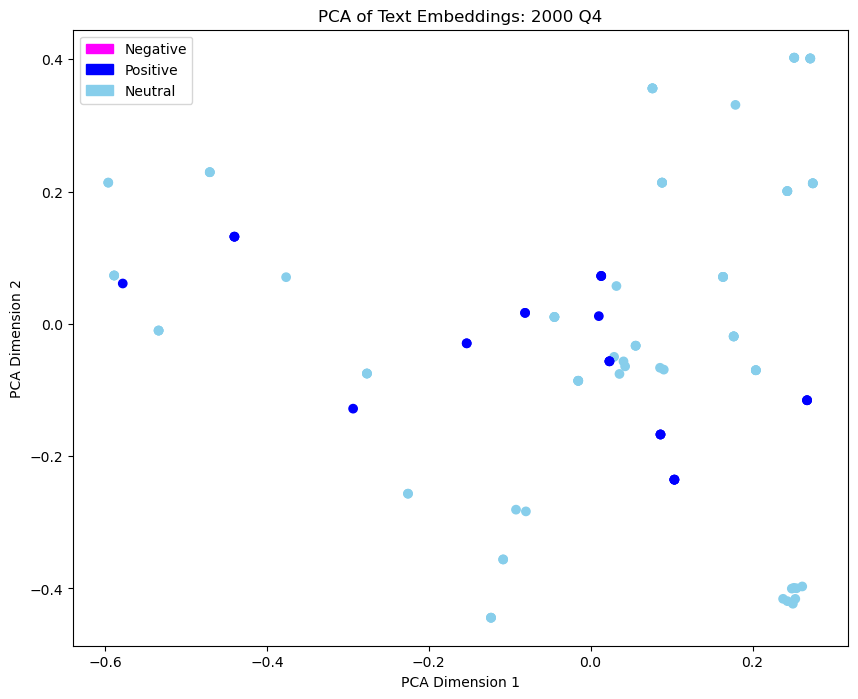

In [38]:
PCA_plot(data_q4, '2000 Q4')

### Printing Messages

In [30]:
negative_msgs_q4 = data_q4[data_q4['label'] == 'negative']
neutral_msgs_q4 = data_q4[data_q4['label'] == 'neutral']
positive_msgs_q4 = data_q4[data_q4['label'] == 'positive']

In [32]:
print_emails(negative_msgs_q4)